In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# TASK 1

In [2]:
# Load the dataset
df = pd.read_csv("allwine.csv", index_col = 0)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.743787          0.805266    -1.455948       -0.541531  -0.334525   
1      -0.520914          1.798500    -1.455948       -0.047918   0.129345   
2      -0.520914          1.136344    -1.251203       -0.259467   0.002835   
3       1.373509         -1.512280     1.410480       -0.541531  -0.355610   
4      -0.743787          0.805266    -1.455948       -0.541531  -0.334525   

   free sulfur dioxide   density        pH  sulphates   alcohol  quality  
0            -0.539436 -0.978159  0.146723  -0.755850 -1.297136        0  
1             0.787432 -0.998211 -1.220838  -0.062351 -0.960761        0  
2            -0.160331 -0.994200 -0.956148  -0.235726 -0.960761        0  
3             0.029222 -0.974148 -1.397297  -0.640267 -0.960761        1  
4            -0.539436 -0.978159  0.146723  -0.755850 -1.297136        0

In [3]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (3198, 11)


In [4]:
df.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   3.198000e+03      3.198000e+03  3.198000e+03    3.198000e+03   
mean   -3.732682e-16     -3.643809e-16  1.688594e-16    5.332403e-17   
std     1.000156e+00      1.000156e+00  1.000156e+00    1.000156e+00   
min    -2.303900e+00     -2.395155e+00 -1.623825e+00   -1.246692e+00   
25%    -6.880688e-01     -7.413923e-01 -9.041204e-01   -4.710149e-01   
50%    -1.883037e-01     -3.776619e-02 -6.651164e-02   -2.594666e-01   
75%     5.638545e-01      6.221545e-01  7.962457e-01    6.705718e-02   
max     4.580738e+00      5.932391e+00  3.824068e+00    9.138676e+00   

          chlorides  free sulfur dioxide       density            pH  \
count  3.198000e+03         3.198000e+03  3.198000e+03  3.198000e+03   
mean  -1.777468e-16        -6.221137e-17 -1.848566e-15  2.132961e-16   
std    1.000156e+00         1.000156e+00  1.000156e+00  1.000156e+00   
min   -1.683967e+00        -1.487200e+00 -1.133162e+00 -3.250120e+00   
25%   -3.766953e-01        -7.930922e-01 -9.992135e-01 -7.796891e-01   
50%   -1.744349e-01        -2.140109e-01 -7.166201e-04 -2.683110e-03   
75%    8.597896e-02         5.481191e-01  9.990931e-01  7.564772e-01   
max    1.115258e+01         5.245422e+00  1.140202e+00  3.769595e+00   

          sulphates       alcohol      quality  
count  3.198000e+03  3.198000e+03  3198.000000  
mean  -3.377189e-16 -3.554936e-17     0.534709  
std    1.000156e+00  1.000156e+00     0.498872  
min   -2.085055e+00 -2.138075e+00     0.000000  
25%   -6.402666e-01 -7.137768e-01     0.000000  
50%   -1.977143e-01 -1.262511e-01     1.000000  
75%    4.338530e-01  6.383188e-01     1.000000  
max    7.944553e+00  4.311531e+00     1.000000

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3198 entries, 0 to 3197
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        3198 non-null   float64
 1   volatile acidity     3198 non-null   float64
 2   citric acid          3198 non-null   float64
 3   residual sugar       3198 non-null   float64
 4   chlorides            3198 non-null   float64
 5   free sulfur dioxide  3198 non-null   float64
 6   density              3198 non-null   float64
 7   pH                   3198 non-null   float64
 8   sulphates            3198 non-null   float64
 9   alcohol              3198 non-null   float64
 10  quality              3198 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 299.8 KB
None


C:\Users\munyu\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


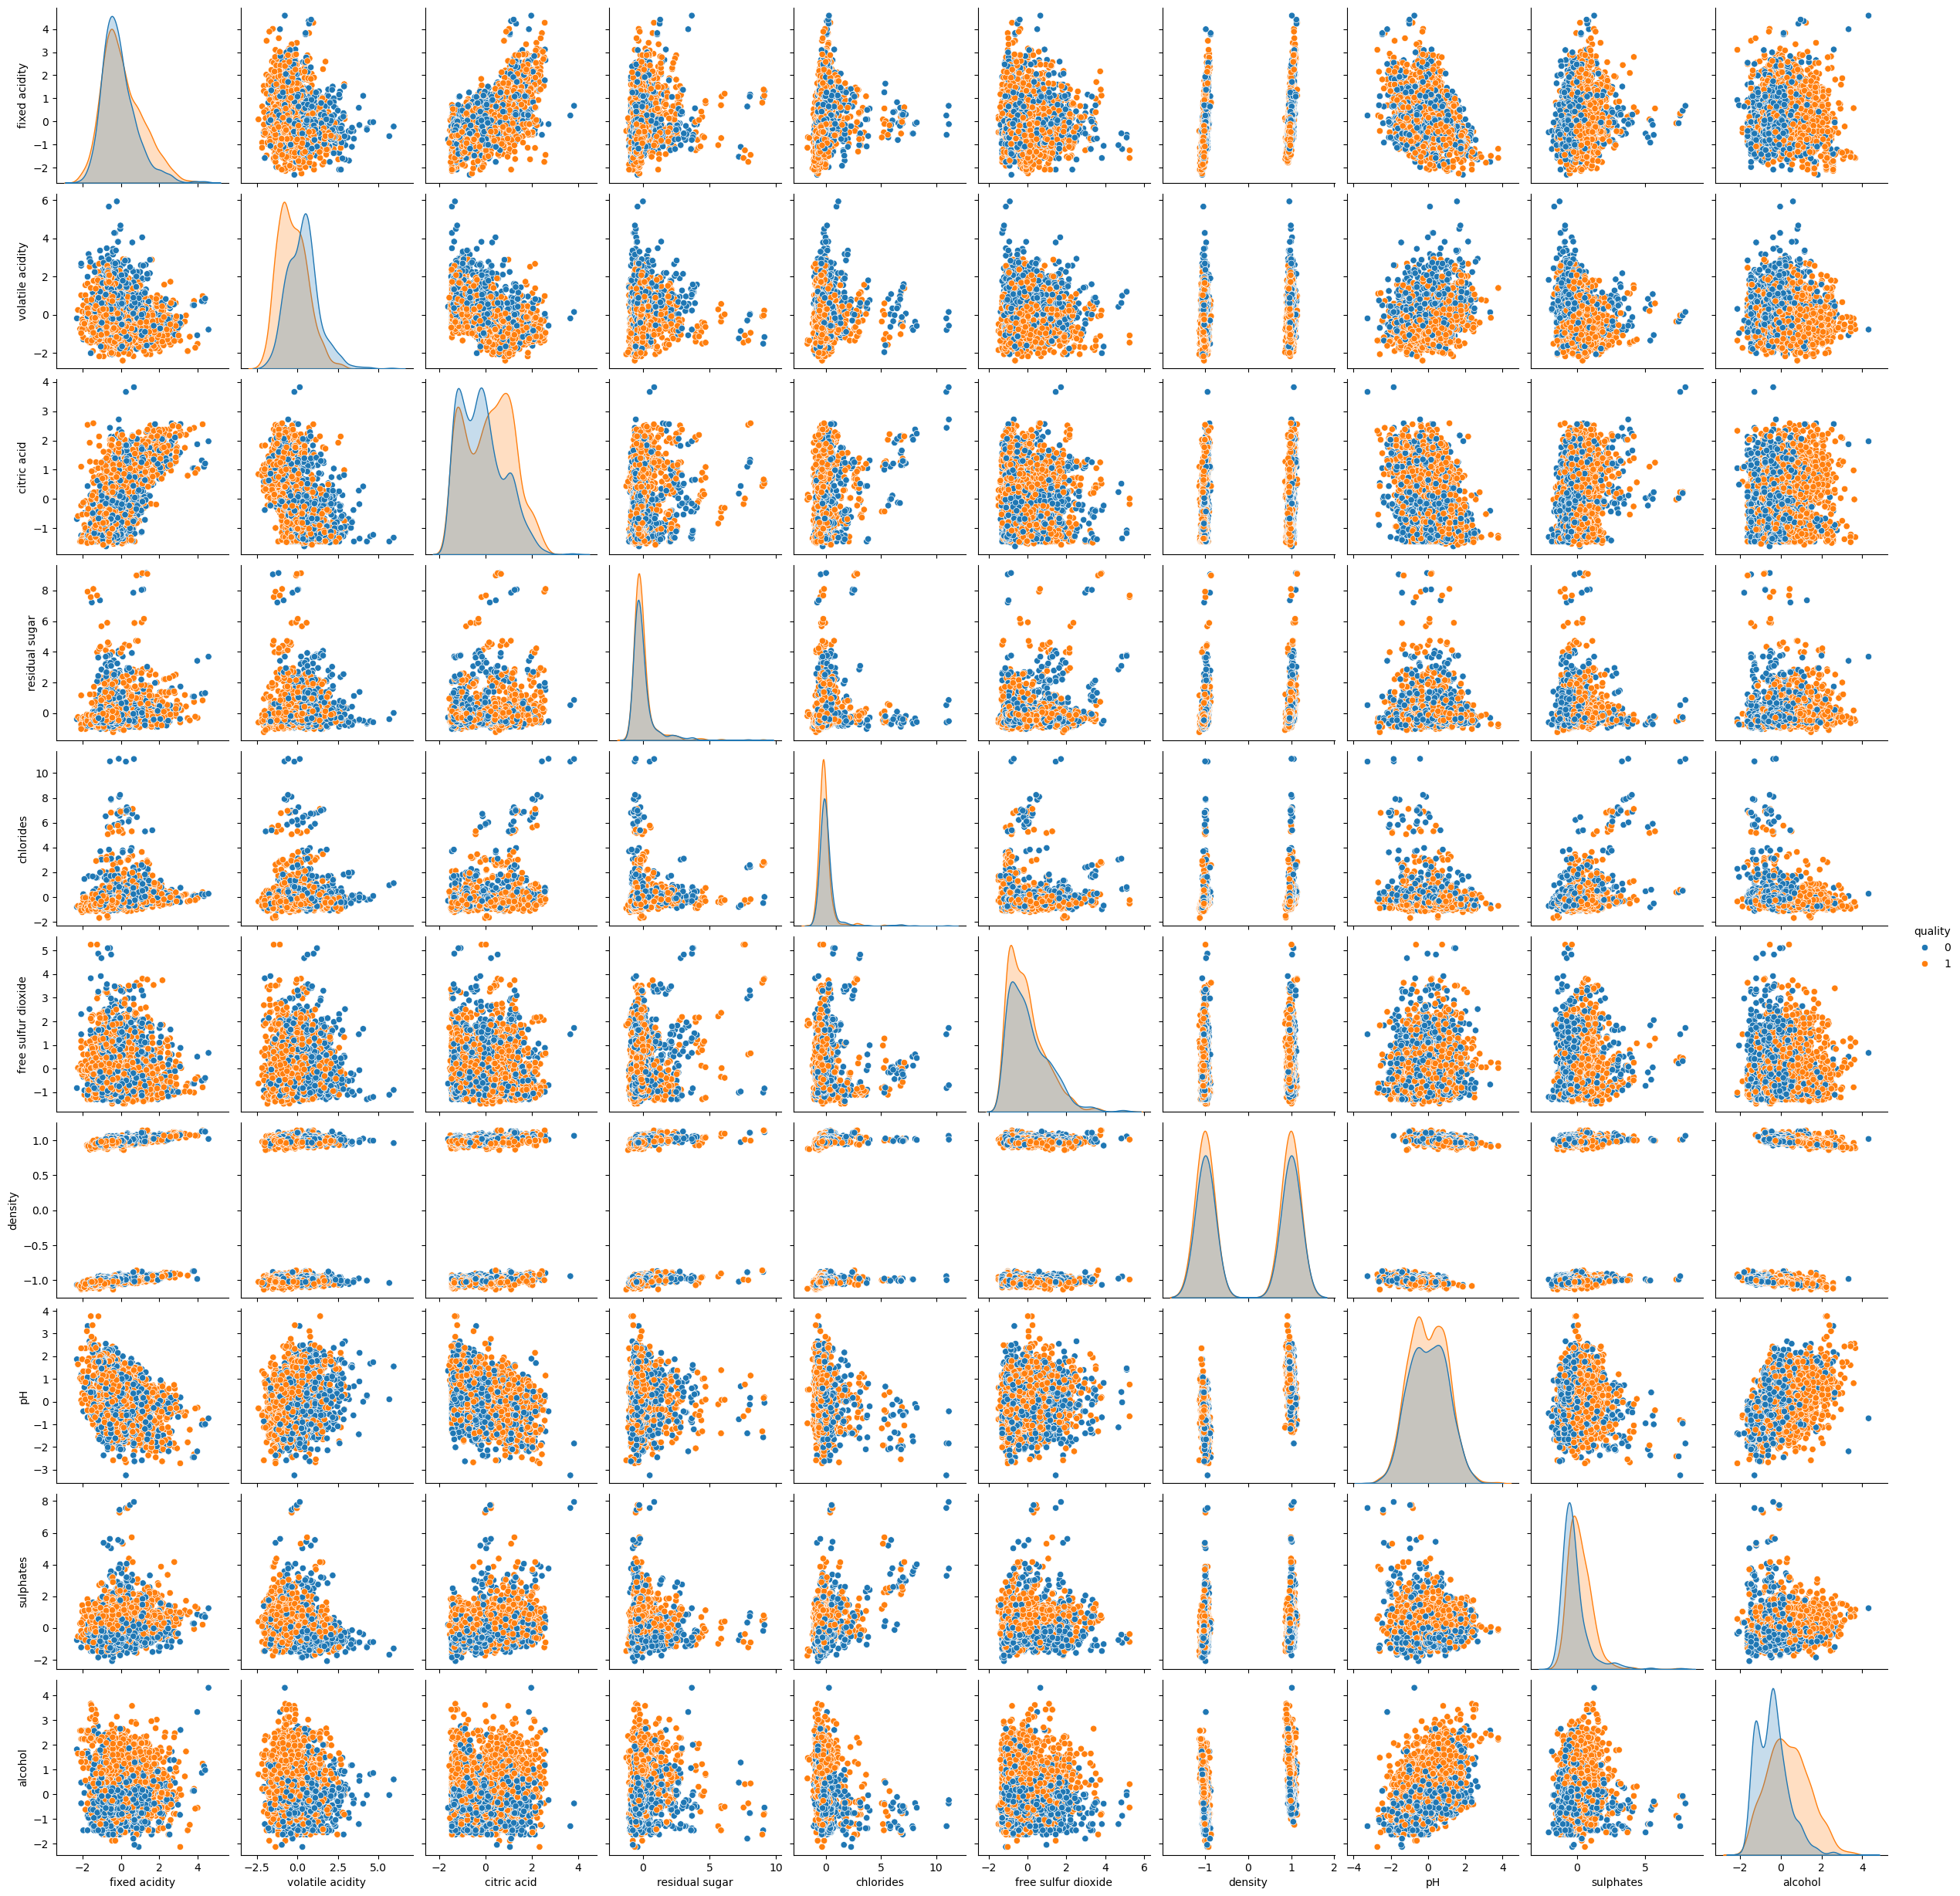

In [6]:
sns.pairplot(df, hue='quality', size=2.5)
plt.show()

# Histograms for features

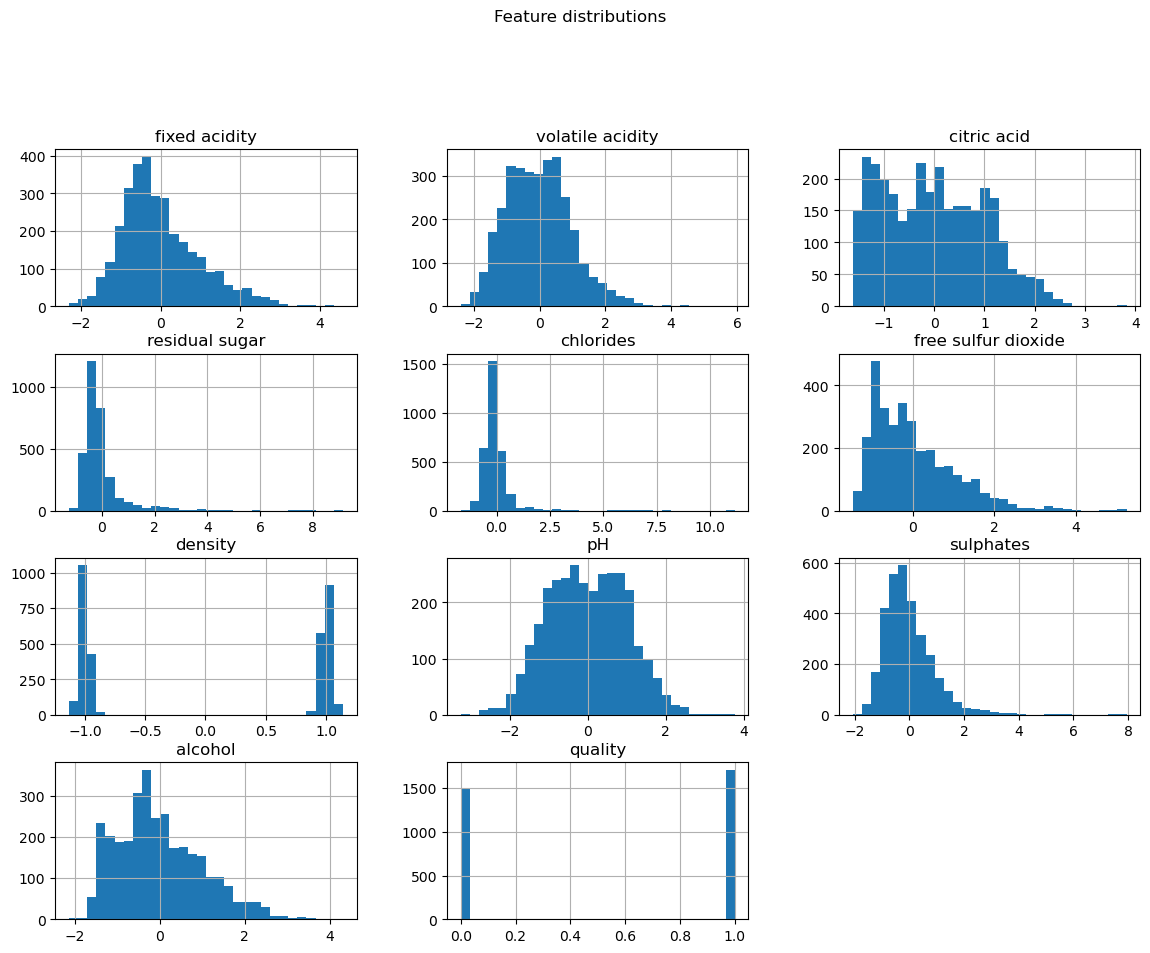

In [7]:
df.hist(bins=30, figsize=(14, 10))
plt.suptitle("Feature distributions", y=1.02)
plt.show()

In [8]:
# Checking how many wines of each quality (0 or 1)
print(df['quality'].value_counts())

quality
1    1710
0    1488
Name: count, dtype: int64


In [9]:
print(df['quality'].value_counts(normalize=True))

quality
1    0.534709
0    0.465291
Name: proportion, dtype: float64


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

# Correlation heatmap

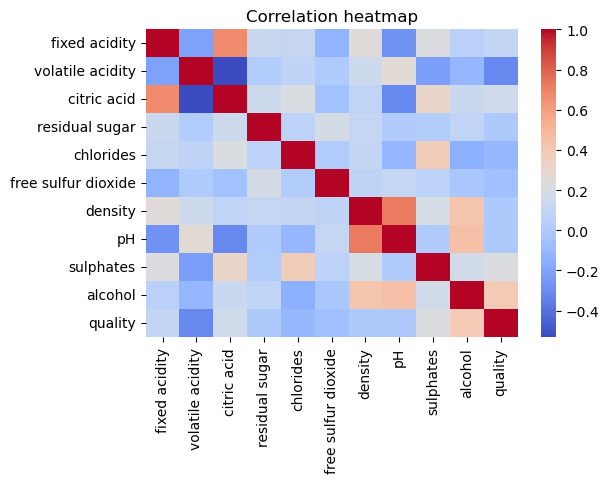

In [11]:
plt.figure(figsize=(6, 4))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [12]:
# Drop 'quality' 
X = df.drop(
    columns=[col for col in df.columns if col == 'quality']
)
# Target remains unchanged
y = df['quality'].values

In [13]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.743787          0.805266    -1.455948       -0.541531  -0.334525   
1         -0.520914          1.798500    -1.455948       -0.047918   0.129345   
2         -0.520914          1.136344    -1.251203       -0.259467   0.002835   
3          1.373509         -1.512280     1.410480       -0.541531  -0.355610   
4         -0.743787          0.805266    -1.455948       -0.541531  -0.334525   
...             ...               ...          ...             ...        ...   
3193      -1.009527          0.611056    -0.801056       -0.405734   0.311967   
3194      -1.093650          0.215938    -0.810016       -0.148816  -0.600907   
3195      -0.934904          0.301116    -0.821255       -0.034845   0.085598   
3196      -1.172243          0.885184    -0.669704       -0.331135  -0.112832   
3197      -1.029159         -1.049223     1.244824        0.836000  -0.351428   

      free sulfur dioxide   density        pH  sulphates   alcohol  
0               -0.539436 -0.978159  0.146723  -0.755850 -1.297136  
1                0.787432 -0.998211 -1.220838  -0.062351 -0.960761  
2               -0.160331 -0.994200 -0.956148  -0.235726 -0.960761  
3                0.029222 -0.974148 -1.397297  -0.640267 -0.960761  
4               -0.539436 -0.978159  0.146723  -0.755850 -1.297136  
...                   ...       ...       ...        ...       ...  
3193             1.637359  0.967620  1.458215  -0.178049  0.667336  
3194             2.138446  0.960494  1.769283   0.764031  1.092995  
3195             1.258999  0.970762  1.162704   0.762585  0.953925  
3196             1.629899  0.965869  1.758352   0.564709  0.439538  
3197             0.152670  0.980522  0.958041   0.301528  0.843071  

[3198 rows x 10 columns]

# Train and test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train inner:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train inner: (2558, 10) (2558,)
Test: (640, 10) (640,)


# Standardize features

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Mean of scaled train features (approx):", X_train_scaled.mean(axis=0)[:3])
print("Std of scaled train features (approx):", X_train_scaled.std(axis=0)[:3])

Mean of scaled train features (approx): [-2.77772766e-18  2.77772766e-18  2.77772766e-17]
Std of scaled train features (approx): [1. 1. 1.]


# Adding bias column (An intercept term is included by adding a bias column of ones, the 10 original features remain unchanged)

In [16]:
def add_bias_column(X):
    
    m = X.shape[0]
    bias = np.ones((m, 1))
    return np.hstack([bias, X])

X_train_i = add_bias_column(X_train_scaled)  
X_test_i  = add_bias_column(X_test_scaled)

print("Train with bias shape:", X_train_i.shape)
print("Test with bias shape:", X_test_i.shape)

Train with bias shape: (2558, 11)
Test with bias shape: (640, 11)


In [17]:
# Split TRAIN into TRAIN + VAL
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_i, y_train,
    test_size=0.2,        # 20% of training becomes validation
    random_state=42,
    stratify=y_train
)
print("Train inner:", X_tr.shape, y_tr.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test_i.shape, y_test.shape)

Train inner: (2046, 11) (2046,)
Val: (512, 11) (512,)
Test: (640, 11) (640,)


# Logistic regression from scratch

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

class LogisticRegressionScratch:
    def __init__(self, lr=0.1, iterations=3000, record_every=50, seed=42, init_scale=0.01):
        self.lr = lr
        self.iterations = iterations
        self.record_every = record_every
        self.seed = seed
        self.init_scale = init_scale
        
        self.theta = None
        self.loss_history = []

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)  # stability
        return 1.0 / (1.0 + np.exp(-z))

    def predict_proba(self, X):
        return self._sigmoid(X @ self.theta)

    def _compute_loss(self, X, y):
        m = len(y)
        h = self.predict_proba(X)
        eps = 1e-12
        return (-1.0 / m) * np.sum(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))

    def fit(self, X, y):
        m, n = X.shape
        rng = np.random.default_rng(self.seed)
        self.theta = rng.normal(loc=0.0, scale=self.init_scale, size=n)  # random init

        self.loss_history = []
        for i in range(self.iterations):
            h = self.predict_proba(X)
            error = h - y
            grad = (1.0 / m) * (X.T @ error)
            self.theta -= self.lr * grad

            if i % self.record_every == 0:
                self.loss_history.append(self._compute_loss(X, y))

        return self

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [21]:
def compute_binary_metrics(y_true, prob_pos, threshold=0.5):
    y_pred = (prob_pos >= threshold).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_true, prob_pos)
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(y_true, y_pred)
    return {
        "acc": acc, "prec": prec, "rec": rec, "auc": roc_auc,
        "fpr": fpr, "tpr": tpr, "cm": cm
    }

# Training

In [22]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
results = []

best_model = None
best_seed = None
best_val_auc = -1

for sd in seeds:
    model = LogisticRegressionScratch(lr=0.1, iterations=3000, record_every=50, seed=sd, init_scale=0.01)
    model.fit(X_tr, y_tr)

    # Validation metrics 
    val_probs = model.predict_proba(X_val)
    val_m = compute_binary_metrics(y_val, val_probs, threshold=0.5)

    # Test metrics 
    test_probs = model.predict_proba(X_test_i)
    test_m = compute_binary_metrics(y_test, test_probs, threshold=0.5)

    results.append({
        "seed": sd,
        "val_acc": val_m["acc"], "val_auc": val_m["auc"],
        "test_acc": test_m["acc"], "test_auc": test_m["auc"],
        "test_prec": test_m["prec"], "test_rec": test_m["rec"]
    })

    print(f"seed={sd:2d} | val_acc={val_m['acc']:.4f} val_auc={val_m['auc']:.4f} | "
          f"test_acc={test_m['acc']:.4f} test_auc={test_m['auc']:.4f}")

    if val_m["auc"] > best_val_auc:
        best_val_auc = val_m["auc"]
        best_model = model
        best_seed = sd
        best_val_pack = val_m
        best_test_pack = test_m

seed= 0 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 1 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 2 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 3 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 4 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 5 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 6 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 7 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 8 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165
seed= 9 | val_acc=0.7422 val_auc=0.8187 | test_acc=0.7188 test_auc=0.8165


In [61]:
# Summary: mean ± std across seeds
val_accs  = np.array([r["val_acc"] for r in results])
val_aucs  = np.array([r["val_auc"] for r in results])
test_accs = np.array([r["test_acc"] for r in results])
test_aucs = np.array([r["test_auc"] for r in results])

print("\nTask 1 summary (mean ± std)")
print(f"VAL  acc: {val_accs.mean():.4f} ± {val_accs.std():.4f}")
print(f"VAL  auc: {val_aucs.mean():.4f} ± {val_aucs.std():.4f}")
print(f"TEST acc: {test_accs.mean():.4f} ± {test_accs.std():.4f}")
print(f"TEST auc: {test_aucs.mean():.4f} ± {test_aucs.std():.4f}")

print("\n Best model (by VAL AUC)")
print("Best seed:", best_seed)
print(f"Best VAL  acc={best_val_pack['acc']:.4f}, auc={best_val_pack['auc']:.4f}")
print(f"Best TEST acc={best_test_pack['acc']:.4f}, auc={best_test_pack['auc']:.4f}, "
      f"prec={best_test_pack['prec']:.4f}, rec={best_test_pack['rec']:.4f}")
print("Best TEST confusion matrix:\n", best_test_pack["cm"])


Task 1 summary (mean ± std)
VAL  acc: 0.7422 ± 0.0000
VAL  auc: 0.8187 ± 0.0000
TEST acc: 0.7188 ± 0.0000
TEST auc: 0.8165 ± 0.0000

 Best model (by VAL AUC)
Best seed: 0
Best VAL  acc=0.7422, auc=0.8187
Best TEST acc=0.7188, auc=0.8165, prec=0.7647, rec=0.6842
Best TEST confusion matrix:
 [[226  72]
 [108 234]]


# Evaluation

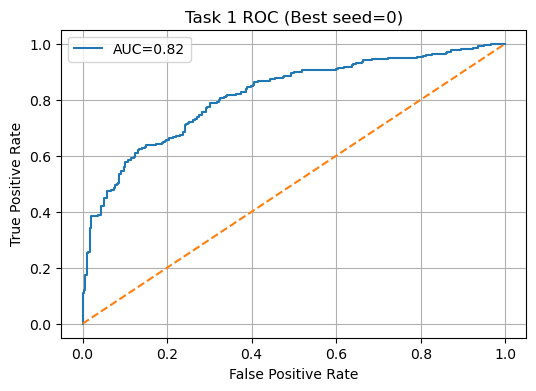

In [24]:
# ROC Curve (Best seed) - Test
plt.figure(figsize=(6,4))
plt.plot(best_test_pack["fpr"], best_test_pack["tpr"], label=f"AUC={best_test_pack['auc']:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Task 1 ROC (Best seed={best_seed})")
plt.legend()
plt.grid(True)
plt.show()

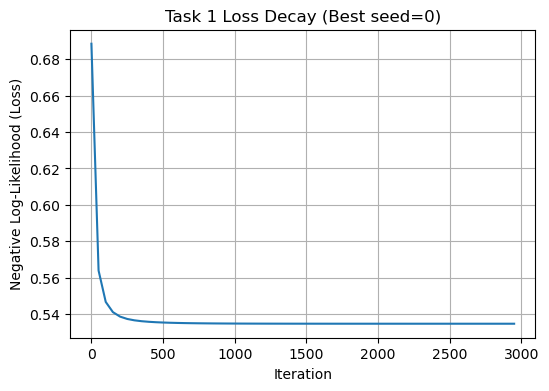

In [25]:
# Loss curve (Best seed)
plt.figure(figsize=(6,4))
x_axis = np.arange(len(best_model.loss_history)) * best_model.record_every
plt.plot(x_axis, best_model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Negative Log-Likelihood (Loss)")
plt.title(f"Task 1 Loss Decay (Best seed={best_seed})")
plt.grid(True)
plt.show()

# TASK 2

In [48]:
X_tr2, X_val2, y_tr2, y_val2 = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(X_tr2.shape, X_val2.shape, X_test_scaled.shape) 

(2046, 10) (512, 10) (640, 10)


In [49]:
from sklearn.metrics import (roc_auc_score, roc_curve, recall_score)
class DynamicEnsembleLogReg:
    def __init__(self, lr=0.05, iterations=6000, record_every=50,
                 seed=42, batch_size=None, lr_decay=0.0, init_scale=0.01):
        self.lr = lr
        self.iterations = iterations
        self.record_every = record_every
        self.seed = seed
        self.batch_size = batch_size
        self.lr_decay = lr_decay
        self.init_scale = init_scale

        self.theta_M = None
        self.theta_L = None
        self.theta_R = None
        self.loss_history = []

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)  # stability
        return 1.0 / (1.0 + np.exp(-z))

    def _forward(self, X):
        hM = self._sigmoid(X @ self.theta_M)
        hL = self._sigmoid(X @ self.theta_L)
        hR = self._sigmoid(X @ self.theta_R)
        return hM, hL, hR

    def predict_proba(self, X):
        hM, hL, hR = self._forward(X)
        p1 = (hL * hM) + (hR * (1.0 - hM))
        return p1

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def _compute_nll(self, X, y, eps=1e-12):
        hM, hL, hR = self._forward(X)
        p1 = (hL * hM) + (hR * (1.0 - hM))
        p0 = ((1.0 - hL) * hM) + ((1.0 - hR) * (1.0 - hM))
        p  = y * p1 + (1.0 - y) * p0
        p  = np.clip(p, eps, 1.0 - eps)
        return -np.mean(np.log(p))

    def fit(self, X, y, verbose=True):
        m, n = X.shape
        rng = np.random.default_rng(self.seed)

        # small random init helps symmetry breaking
        self.theta_M = rng.normal(0.0, self.init_scale, size=n)
        self.theta_L = rng.normal(0.0, self.init_scale, size=n)
        self.theta_R = rng.normal(0.0, self.init_scale, size=n)

        eps = 1e-12
        self.loss_history = []

        for it in range(self.iterations):
            # mini-batch
            if self.batch_size is None:
                Xb, yb = X, y
            else:
                idx = rng.integers(0, m, size=self.batch_size)
                Xb, yb = X[idx], y[idx]

            mb = len(yb)

            # Forward
            hM, hL, hR = self._forward(Xb)

            # Probabilities
            p1 = (hL * hM) + (hR * (1.0 - hM))
            p0 = ((1.0 - hL) * hM) + ((1.0 - hR) * (1.0 - hM))
            p  = yb * p1 + (1.0 - yb) * p0
            p  = np.clip(p, eps, 1.0 - eps)

            # s = +1 if y=1, -1 if y=0
            s = (2.0 * yb - 1.0)
            common = (s / p)

            # Gradients (derived from NLL)
            grad_L = -(1.0 / mb) * (Xb.T @ (common * hM * (hL * (1.0 - hL))))
            grad_R = -(1.0 / mb) * (Xb.T @ (common * (1.0 - hM) * (hR * (1.0 - hR))))
            grad_M = -(1.0 / mb) * (Xb.T @ (common * (hL - hR) * (hM * (1.0 - hM))))

            # LR decay
            lr_t = self.lr / (1.0 + self.lr_decay * it)

            # Update
            self.theta_L -= lr_t * grad_L
            self.theta_R -= lr_t * grad_R
            self.theta_M -= lr_t * grad_M

            # Record full-data loss
            if it % self.record_every == 0:
                loss = self._compute_nll(X, y)
                self.loss_history.append(loss)
                if verbose and it % (self.record_every * 10) == 0:
                    print(f"Iter {it:5d} | NLL: {loss:.6f}")

        return self

In [50]:
def best_threshold_by_val_auc(y_true, probs):
    best_t, best_acc = 0.5, -1
    for t in np.linspace(0.05, 0.95, 181):
        preds = (probs >= t).astype(int)
        acc = accuracy_score(y_true, preds)
        if acc > best_acc:
            best_acc = acc
            best_t = t
    return best_t, best_acc

In [51]:
def evaluate_all(y_true, probs, thr=0.5):
    preds = (probs >= thr).astype(int)
    return {
        "acc": accuracy_score(y_true, preds),
        "auc": roc_auc_score(y_true, probs),
        "prec": precision_score(y_true, preds, zero_division=0),
        "rec": recall_score(y_true, preds, zero_division=0),
        "cm": confusion_matrix(y_true, preds)
    }

In [52]:
def plot_roc(y_true, probs, title):
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc_val = roc_auc_score(y_true, probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_val:.4f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_nll(loss_history, record_every, title):
    xs = np.arange(len(loss_history)) * record_every
    plt.figure(figsize=(6,4))
    plt.plot(xs, loss_history)
    plt.xlabel("Iteration")
    plt.ylabel("NLL")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Training model Task 2

In [53]:
seeds = list(range(10))

all_val_acc, all_val_auc = [], []
all_test_acc, all_test_auc = [], []

best = {
    "seed": None,
    "val_auc": -1,
    "thr": 0.5,
    "model": None,
    "val_metrics": None,
    "test_metrics": None
}

for sd in seeds:
    model = DynamicEnsembleLogReg(
        lr=0.05,
        iterations=6000,
        record_every=50,
        seed=sd,
        batch_size=256,
        lr_decay=1e-4,
        init_scale=0.01
    )
    model.fit(X_tr2, y_tr2, verbose=False)

    # Validation
    val_probs = model.predict_proba(X_val2)
    thr, _ = best_threshold_by_val_auc(y_val, val_probs)
    val_metrics = evaluate_all(y_val, val_probs, thr=thr)

    # Test 
    test_probs = model.predict_proba(X_test_scaled)
    test_metrics = evaluate_all(y_test, test_probs, thr=thr)

    all_val_acc.append(val_metrics["acc"])
    all_val_auc.append(val_metrics["auc"])
    all_test_acc.append(test_metrics["acc"])
    all_test_auc.append(test_metrics["auc"])

    print(
        f"seed={sd:2d} | "
        f"val_acc={val_metrics['acc']:.4f} val_auc={val_metrics['auc']:.4f} | "
        f"test_acc={test_metrics['acc']:.4f} test_auc={test_metrics['auc']:.4f} | "
        f"thr={thr:.2f}"
    )

    # Select best by VAL AUC 
    if val_metrics["auc"] > best["val_auc"]:
        best.update({
            "seed": sd,
            "val_auc": val_metrics["auc"],
            "thr": thr,
            "model": model,
            "val_metrics": val_metrics,
            "test_metrics": test_metrics
        })

seed= 0 | val_acc=0.7559 val_auc=0.8264 | test_acc=0.7391 test_auc=0.8276 | thr=0.52
seed= 1 | val_acc=0.7598 val_auc=0.8283 | test_acc=0.7469 test_auc=0.8110 | thr=0.44
seed= 2 | val_acc=0.7617 val_auc=0.8183 | test_acc=0.7531 test_auc=0.8214 | thr=0.41
seed= 3 | val_acc=0.7539 val_auc=0.8246 | test_acc=0.7312 test_auc=0.8285 | thr=0.53
seed= 4 | val_acc=0.7637 val_auc=0.8240 | test_acc=0.7406 test_auc=0.8232 | thr=0.51
seed= 5 | val_acc=0.7559 val_auc=0.8235 | test_acc=0.7422 test_auc=0.8296 | thr=0.53
seed= 6 | val_acc=0.7500 val_auc=0.8257 | test_acc=0.7344 test_auc=0.8285 | thr=0.54
seed= 7 | val_acc=0.7520 val_auc=0.8257 | test_acc=0.7406 test_auc=0.8287 | thr=0.48
seed= 8 | val_acc=0.7578 val_auc=0.8220 | test_acc=0.7484 test_auc=0.8154 | thr=0.45
seed= 9 | val_acc=0.7539 val_auc=0.8259 | test_acc=0.7531 test_auc=0.8297 | thr=0.42


# Evaluation 

In [55]:
# Summary
print("\nTask 2 Multi-start summary (mean ± std)")
print(f"VAL  acc: {np.mean(all_val_acc):.4f} ± {np.std(all_val_acc):.4f}")
print(f"VAL  auc: {np.mean(all_val_auc):.4f} ± {np.std(all_val_auc):.4f}")
print(f"TEST acc: {np.mean(all_test_acc):.4f} ± {np.std(all_test_acc):.4f}")
print(f"TEST auc: {np.mean(all_test_auc):.4f} ± {np.std(all_test_auc):.4f}")

print("\nBest model (by VAL AUC)")
print("Best seed:", best["seed"])
print(f"Best VAL  acc={best['val_metrics']['acc']:.4f}, auc={best['val_metrics']['auc']:.4f}")
print(f"Best TEST acc={best['test_metrics']['acc']:.4f}, auc={best['test_metrics']['auc']:.4f}, "
      f"prec={best['test_metrics']['prec']:.4f}, rec={best['test_metrics']['rec']:.4f}")
print("Best TEST confusion matrix:\n", best["test_metrics"]["cm"])


Task 2 Multi-start summary (mean ± std)
VAL  acc: 0.7564 ± 0.0041
VAL  auc: 0.8244 ± 0.0026
TEST acc: 0.7430 ± 0.0070
TEST auc: 0.8244 ± 0.0062

Best model (by VAL AUC)
Best seed: 1
Best VAL  acc=0.7598, auc=0.8283
Best TEST acc=0.7469, auc=0.8110, prec=0.7795, rec=0.7339
Best TEST confusion matrix:
 [[227  71]
 [ 91 251]]


# Plots for best seed (ROC + NLL curve)

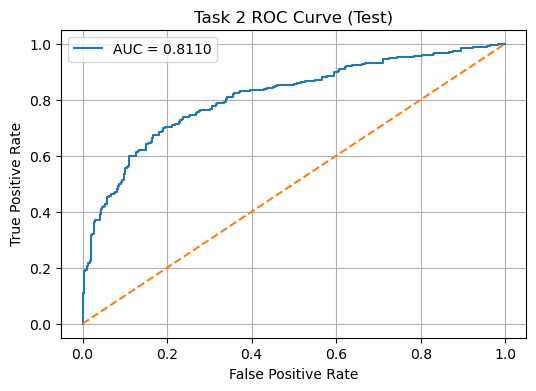

In [57]:
best_model = best["model"]
best_thr = best["thr"]
# ROC on Test
test_probs_best = best_model.predict_proba(X_test_scaled)
plot_roc(y_test, test_probs_best, title="Task 2 ROC Curve (Test)")

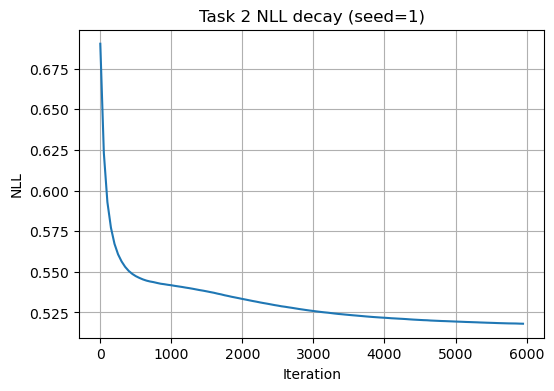

In [58]:
# NLL curve during training
plot_nll(best_model.loss_history, best_model.record_every,
         title=f"Task 2 NLL decay (seed={best['seed']})")

#The two-layer dynamic ensemble consistently outperforms the baseline logistic regression model. Averaged across 10 random initializations, the ensemble achieves a higher test AUC (0.824 ± 0.006) compared to the baseline (0.817 ± 0.000), along with improved accuracy and recall. These results confirm that probabilistic routing and conditional specialization provide measurable performance gains over linear classifiers.

# Task 3

In [68]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("Train:", X_tr.shape, y_tr.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test_scaled.shape, y_test.shape)

Train: (2046, 10) (2046,)
Val:   (512, 10) (512,)
Test:  (640, 10) (640,)


In [69]:
def evaluate_all(y_true, probs, thr=0.5):
    preds = (probs >= thr).astype(int)
    return {
        "acc": accuracy_score(y_true, preds),
        "auc": roc_auc_score(y_true, probs),
        "prec": precision_score(y_true, preds, zero_division=0),
        "rec": recall_score(y_true, preds, zero_division=0),
        "cm": confusion_matrix(y_true, preds)
    }

def best_threshold_by_val_acc(y_true, probs):
    best_t, best_acc = 0.5, -1
    for t in np.linspace(0.05, 0.95, 181):
        acc = accuracy_score(y_true, (probs >= t).astype(int))
        if acc > best_acc:
            best_acc = acc
            best_t = t
    return best_t, best_acc

def plot_roc(y_true, probs, title):
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc_val = roc_auc_score(y_true, probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_val:.4f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_nll(loss_history, record_every, title):
    xs = np.arange(len(loss_history)) * record_every
    plt.figure(figsize=(6,4))
    plt.plot(xs, loss_history)
    plt.xlabel("Iteration")
    plt.ylabel("NLL")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [70]:
class DeepDynamicEnsembleLogReg_3Layer:
    def __init__(self, lr=0.02, iterations=15000, record_every=100,
                 seed=42, batch_size=None, lr_decay=0.0, init_scale=0.01):
        self.lr = lr
        self.iterations = iterations
        self.record_every = record_every
        self.seed = seed
        self.batch_size = batch_size
        self.lr_decay = lr_decay
        self.init_scale = init_scale

        self.theta = {}       
        self.loss_history = []

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z))

    def _forward(self, X):
        h = {}
        for k in range(1, 8):
            h[k] = self._sigmoid(X @ self.theta[k])
        return h

    def predict_proba(self, X):
        h = self._forward(X)

        h1, h2, h3 = h[1], h[2], h[3]
        h4, h5, h6, h7 = h[4], h[5], h[6], h[7]

        left_1  = h2*h4 + (1.0-h2)*h5
        right_1 = h3*h6 + (1.0-h3)*h7

        p1 = h1*left_1 + (1.0-h1)*right_1
        return p1

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def _compute_nll(self, X, y, eps=1e-12):
        h = self._forward(X)
        h1, h2, h3 = h[1], h[2], h[3]
        h4, h5, h6, h7 = h[4], h[5], h[6], h[7]

        left_1  = h2*h4 + (1.0-h2)*h5
        right_1 = h3*h6 + (1.0-h3)*h7
        p1 = h1*left_1 + (1.0-h1)*right_1

        left_0  = h2*(1.0-h4) + (1.0-h2)*(1.0-h5)
        right_0 = h3*(1.0-h6) + (1.0-h3)*(1.0-h7)
        p0 = h1*left_0 + (1.0-h1)*right_0

        p = y*p1 + (1.0-y)*p0
        p = np.clip(p, eps, 1.0-eps)
        return -np.mean(np.log(p))

    def fit(self, X, y, verbose=True):
        m, n = X.shape
        rng = np.random.default_rng(self.seed)

        # independent parameters for all nodes
        self.theta = {k: rng.normal(0.0, self.init_scale, size=n) for k in range(1, 8)}
        self.loss_history = []
        eps = 1e-12

        for it in range(self.iterations):

            # mini-batch
            if self.batch_size is None:
                Xb, yb = X, y
            else:
                idx = rng.integers(0, m, size=self.batch_size)
                Xb, yb = X[idx], y[idx]

            mb = len(yb)

            # forward
            h = self._forward(Xb)
            h1, h2, h3 = h[1], h[2], h[3]
            h4, h5, h6, h7 = h[4], h[5], h[6], h[7]

            # p1, p0, p
            left_1  = h2*h4 + (1.0-h2)*h5
            right_1 = h3*h6 + (1.0-h3)*h7
            p1 = h1*left_1 + (1.0-h1)*right_1

            left_0  = h2*(1.0-h4) + (1.0-h2)*(1.0-h5)
            right_0 = h3*(1.0-h6) + (1.0-h3)*(1.0-h7)
            p0 = h1*left_0 + (1.0-h1)*right_0

            p = yb*p1 + (1.0-yb)*p0
            p = np.clip(p, eps, 1.0-eps)
            s = (2.0*yb - 1.0)
            common = (s / p)

            # path weights to leaves 
            path4 = h1*h2
            path5 = h1*(1.0-h2)
            path6 = (1.0-h1)*h3
            path7 = (1.0-h1)*(1.0-h3)

            # gradients (vector form)
            grads = {}

            # leaves
            grads[4] = -(1.0/mb) * (Xb.T @ (common * path4 * (h4*(1.0-h4))))
            grads[5] = -(1.0/mb) * (Xb.T @ (common * path5 * (h5*(1.0-h5))))
            grads[6] = -(1.0/mb) * (Xb.T @ (common * path6 * (h6*(1.0-h6))))
            grads[7] = -(1.0/mb) * (Xb.T @ (common * path7 * (h7*(1.0-h7))))

            # internal node2
            grads[2] = -(1.0/mb) * (Xb.T @ (common * (h1*(h4 - h5)) * (h2*(1.0-h2))))

            # internal node3
            grads[3] = -(1.0/mb) * (Xb.T @ (common * ((1.0-h1)*(h6 - h7)) * (h3*(1.0-h3))))

            # root node1
            grads[1] = -(1.0/mb) * (Xb.T @ (common * ((left_1 - right_1)) * (h1*(1.0-h1))))

            # lr decay + update
            lr_t = self.lr / (1.0 + self.lr_decay*it)
            for k in range(1, 8):
                self.theta[k] -= lr_t * grads[k]

            if it % self.record_every == 0:
                loss = self._compute_nll(X, y)
                self.loss_history.append(loss)
                if verbose and it % (self.record_every*10) == 0:
                    print(f"Iter {it:5d} | NLL: {loss:.6f}")

        return self

# Train model Task 3 

In [71]:
seeds = list(range(10))

all_val_acc, all_val_auc = [], []
all_test_acc, all_test_auc = [], []

best = {
    "seed": None,
    "val_auc": -1,
    "thr": 0.5,
    "model": None,
    "val_metrics": None,
    "test_metrics": None
}

for sd in seeds:
    model = DeepDynamicEnsembleLogReg_3Layer(
        lr=0.02,
        iterations=15000,
        record_every=100,
        seed=sd,
        batch_size=256,
        lr_decay=1e-4,
        init_scale=0.01
    )
    model.fit(X_tr, y_tr, verbose=False)

    # Validation threshold selection (by VAL accuracy)
    val_probs = model.predict_proba(X_val)
    thr, _ = best_threshold_by_val_acc(y_val, val_probs)
    val_metrics = evaluate_all(y_val, val_probs, thr=thr)

    # Test (use same thr)
    test_probs = model.predict_proba(X_test_scaled)
    test_metrics = evaluate_all(y_test, test_probs, thr=thr)

    all_val_acc.append(val_metrics["acc"])
    all_val_auc.append(val_metrics["auc"])
    all_test_acc.append(test_metrics["acc"])
    all_test_auc.append(test_metrics["auc"])

    print(
        f"seed={sd:2d} | "
        f"val_acc={val_metrics['acc']:.4f} val_auc={val_metrics['auc']:.4f} | "
        f"test_acc={test_metrics['acc']:.4f} test_auc={test_metrics['auc']:.4f} | "
        f"thr={thr:.2f}"
    )

    # best by VAL AUC 
    if val_metrics["auc"] > best["val_auc"]:
        best.update({
            "seed": sd,
            "val_auc": val_metrics["auc"],
            "thr": thr,
            "model": model,
            "val_metrics": val_metrics,
            "test_metrics": test_metrics
        })

seed= 0 | val_acc=0.7598 val_auc=0.8224 | test_acc=0.7547 test_auc=0.8218 | thr=0.37
seed= 1 | val_acc=0.7656 val_auc=0.8279 | test_acc=0.7516 test_auc=0.8210 | thr=0.38
seed= 2 | val_acc=0.7637 val_auc=0.8298 | test_acc=0.7484 test_auc=0.8182 | thr=0.37
seed= 3 | val_acc=0.7539 val_auc=0.8248 | test_acc=0.7500 test_auc=0.8224 | thr=0.38
seed= 4 | val_acc=0.7656 val_auc=0.8283 | test_acc=0.7422 test_auc=0.8192 | thr=0.37
seed= 5 | val_acc=0.7656 val_auc=0.8291 | test_acc=0.7578 test_auc=0.8232 | thr=0.36
seed= 6 | val_acc=0.7617 val_auc=0.8250 | test_acc=0.7531 test_auc=0.8164 | thr=0.38
seed= 7 | val_acc=0.7656 val_auc=0.8271 | test_acc=0.7531 test_auc=0.8187 | thr=0.39
seed= 8 | val_acc=0.7656 val_auc=0.8274 | test_acc=0.7562 test_auc=0.8235 | thr=0.37
seed= 9 | val_acc=0.7559 val_auc=0.8246 | test_acc=0.7531 test_auc=0.8226 | thr=0.38


# Evaluation 

In [72]:
print("\nTask 3 Multi-start summary (mean ± std)")
print(f"VAL  acc: {np.mean(all_val_acc):.4f} ± {np.std(all_val_acc):.4f}")
print(f"VAL  auc: {np.mean(all_val_auc):.4f} ± {np.std(all_val_auc):.4f}")
print(f"TEST acc: {np.mean(all_test_acc):.4f} ± {np.std(all_test_acc):.4f}")
print(f"TEST auc: {np.mean(all_test_auc):.4f} ± {np.std(all_test_auc):.4f}")

print("\nBest model (by VAL AUC)")
print("Best seed:", best["seed"])
print(f"Best VAL  acc={best['val_metrics']['acc']:.4f}, auc={best['val_metrics']['auc']:.4f}")
print(f"Best TEST acc={best['test_metrics']['acc']:.4f}, auc={best['test_metrics']['auc']:.4f}, "
      f"prec={best['test_metrics']['prec']:.4f}, rec={best['test_metrics']['rec']:.4f}")
print("Best TEST confusion matrix:\n", best["test_metrics"]["cm"])


Task 3 Multi-start summary (mean ± std)
VAL  acc: 0.7623 ± 0.0042
VAL  auc: 0.8267 ± 0.0022
TEST acc: 0.7520 ± 0.0042
TEST auc: 0.8207 ± 0.0023

Best model (by VAL AUC)
Best seed: 2
Best VAL  acc=0.7637, auc=0.8298
Best TEST acc=0.7484, auc=0.8182, prec=0.7479, rec=0.7982
Best TEST confusion matrix:
 [[206  92]
 [ 69 273]]


# (ROC + NLL decay for best seed)

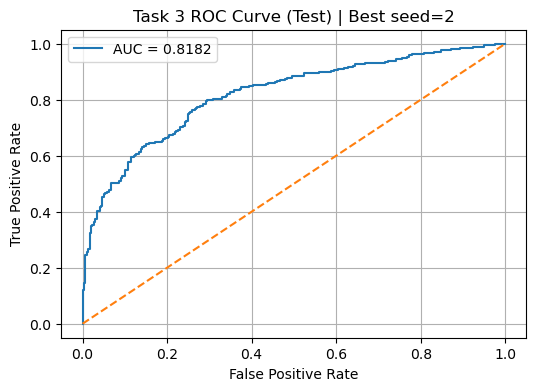

In [74]:
best_model = best["model"]
best_thr   = best["thr"]

test_probs_best = best_model.predict_proba(X_test_scaled)
plot_roc(y_test, test_probs_best, title=f"Task 3 ROC Curve (Test) | Best seed={best['seed']}")

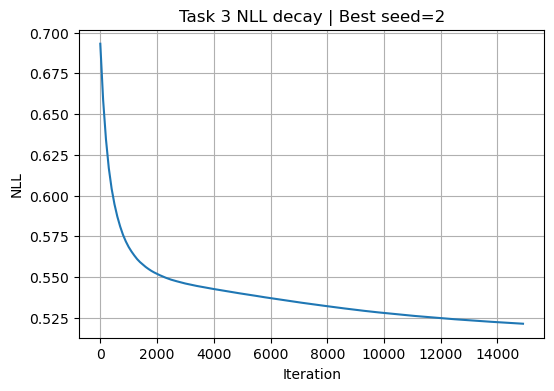

In [75]:
plot_nll(best_model.loss_history, best_model.record_every, title=f"Task 3 NLL decay | Best seed={best['seed']}")

-The baseline logistic regression model (Task 1) achieved a test AUC of 0.8165.

-Introducing a dynamic ensemble structure in Task 2 improved performance, yielding a mean test AUC of 0.8244 ± 0.0062.

# TASK 4

# N-layer Dynamic Ensemble Logistic Regression (general)

In [76]:
class DeepDynamicEnsembleLogReg_NLayer:
    def __init__(self, n_layers=3, lr=0.02, iterations=15000, record_every=100,
                 seed=42, batch_size=None, lr_decay=0.0, init_scale=0.01):
        self.n_layers = int(n_layers)
        assert self.n_layers >= 1

        self.lr = lr
        self.iterations = iterations
        self.record_every = record_every
        self.seed = seed
        self.batch_size = batch_size
        self.lr_decay = lr_decay
        self.init_scale = init_scale

        self.theta = None
        self.loss_history = []

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z))

    def _num_nodes(self):
        return (2 ** self.n_layers) - 1

    def _leaf_start(self):
        # indexed nodes
        return 2 ** (self.n_layers - 1)

    def predict_proba(self, X):
        m, n = X.shape
        K = self._num_nodes()
        leaf_start = self._leaf_start()

        # indexed buffers for clarity
        P = np.zeros((K + 1, m))
        g = np.zeros((K + 1, m))   # gate probs for internal nodes

        # compute node probs
        # leaves
        for j in range(leaf_start, K + 1):
            z = X @ self.theta[j]
            P[j] = self._sigmoid(z)

        # internal nodes
        for j in range(leaf_start - 1, 0, -1):
            z = X @ self.theta[j]
            g[j] = self._sigmoid(z)
            left, right = 2*j, 2*j + 1
            P[j] = g[j] * P[left] + (1.0 - g[j]) * P[right]

        return P[1]  # shape (m,)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def _compute_nll(self, X, y, eps=1e-12):
        p = self.predict_proba(X)
        p = np.clip(p, eps, 1.0 - eps)
        return -np.mean(y * np.log(p) + (1.0 - y) * np.log(1.0 - p))

    def fit(self, X, y, verbose=True):
        m, n = X.shape
        K = self._num_nodes()
        leaf_start = self._leaf_start()

        rng = np.random.default_rng(self.seed)
        self.theta = {}
        for j in range(1, K + 1):
            self.theta[j] = rng.normal(0.0, self.init_scale, size=n)

        self.loss_history = []
        eps = 1e-12

        for it in range(self.iterations):
            # mini-batch
            if self.batch_size is None:
                Xb, yb = X, y
            else:
                idx = rng.integers(0, m, size=self.batch_size)
                Xb, yb = X[idx], y[idx]

            mb = len(yb)

            # Forward 
            P = np.zeros((K + 1, mb))
            g = np.zeros((K + 1, mb))

            # leaves
            for j in range(leaf_start, K + 1):
                z = Xb @ self.theta[j]
                P[j] = self._sigmoid(z)

            # internal bottom-up
            for j in range(leaf_start - 1, 0, -1):
                z = Xb @ self.theta[j]
                g[j] = self._sigmoid(z)
                left, right = 2*j, 2*j + 1
                P[j] = g[j] * P[left] + (1.0 - g[j]) * P[right]

            p = np.clip(P[1], eps, 1.0 - eps)

            # Backprop through tree
            dP = np.zeros((K + 1, mb))
            dP[1] = (p - yb) / (p * (1.0 - p))  # shape (mb,)

            grads = {}
            for j in range(1, K + 1):
                grads[j] = np.zeros_like(self.theta[j])

            # propagate from root to leaves
            for j in range(1, leaf_start):
                left, right = 2*j, 2*j + 1

                # dP to children
                dP[left]  += dP[j] * g[j]
                dP[right] += dP[j] * (1.0 - g[j])

                # gate gradient
                dg = dP[j] * (P[left] - P[right])
                dz = dg * g[j] * (1.0 - g[j])  # sigmoid'(z)

                grads[j] = (Xb.T @ dz) / mb

            # leaf gradients
            for j in range(leaf_start, K + 1):
                # P[j] is leaf prob sigmoid(z)
                dz = dP[j] * P[j] * (1.0 - P[j])
                grads[j] = (Xb.T @ dz) / mb

            # Update
            lr_t = self.lr / (1.0 + self.lr_decay * it)
            for j in range(1, K + 1):
                self.theta[j] -= lr_t * grads[j]

            #Record loss
            if it % self.record_every == 0:
                loss = self._compute_nll(X, y)
                self.loss_history.append(loss)
                if verbose and it % (self.record_every * 10) == 0:
                    print(f"Iter {it:5d} | NLL: {loss:.6f}")

        return self

In [77]:
def evaluate_all(y_true, probs, thr=0.5):
    preds = (probs >= thr).astype(int)
    return {
        "acc": accuracy_score(y_true, preds),
        "auc": roc_auc_score(y_true, probs),
        "prec": precision_score(y_true, preds, zero_division=0),
        "rec": recall_score(y_true, preds, zero_division=0),
        "cm": confusion_matrix(y_true, preds)
    }

def best_threshold_by_val_acc(y_true, probs):
    best_t, best_acc = 0.5, -1
    for t in np.linspace(0.05, 0.95, 181):
        preds = (probs >= t).astype(int)
        acc = accuracy_score(y_true, preds)
        if acc > best_acc:
            best_acc = acc
            best_t = t
    return best_t, best_acc

def plot_roc(y_true, probs, title):
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc_val = roc_auc_score(y_true, probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_val:.4f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_nll(loss_history, record_every, title):
    xs = np.arange(len(loss_history)) * record_every
    plt.figure(figsize=(6,4))
    plt.plot(xs, loss_history)
    plt.xlabel("Iteration")
    plt.ylabel("NLL")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [78]:
n_layers = 4
seeds = list(range(10))

all_val_acc, all_val_auc = [], []
all_test_acc, all_test_auc = [], []

best = {"seed": None, "val_auc": -1, "thr": 0.5, "model": None,
        "val_metrics": None, "test_metrics": None}

for sd in seeds:
    model = DeepDynamicEnsembleLogReg_NLayer(
        n_layers=n_layers,
        lr=0.02,
        iterations=15000,
        record_every=100,
        seed=sd,
        batch_size=256,
        lr_decay=1e-4,
        init_scale=0.01
    )
    model.fit(X_tr2, y_tr2, verbose=False)

    # Validation
    val_probs = model.predict_proba(X_val2)
    thr, _ = best_threshold_by_val_acc(y_val2, val_probs)
    val_metrics = evaluate_all(y_val2, val_probs, thr=thr)

    # Test
    test_probs = model.predict_proba(X_test_scaled)
    test_metrics = evaluate_all(y_test, test_probs, thr=thr)

    all_val_acc.append(val_metrics["acc"])
    all_val_auc.append(val_metrics["auc"])
    all_test_acc.append(test_metrics["acc"])
    all_test_auc.append(test_metrics["auc"])

    print(
        f"seed={sd:2d} | "
        f"val_acc={val_metrics['acc']:.4f} val_auc={val_metrics['auc']:.4f} | "
        f"test_acc={test_metrics['acc']:.4f} test_auc={test_metrics['auc']:.4f} | "
        f"thr={thr:.2f}"
    )

    if val_metrics["auc"] > best["val_auc"]:
        best.update({
            "seed": sd,
            "val_auc": val_metrics["auc"],
            "thr": thr,
            "model": model,
            "val_metrics": val_metrics,
            "test_metrics": test_metrics
        })

seed= 0 | val_acc=0.7637 val_auc=0.8166 | test_acc=0.7438 test_auc=0.8132 | thr=0.36
seed= 1 | val_acc=0.7637 val_auc=0.8161 | test_acc=0.7406 test_auc=0.8116 | thr=0.36
seed= 2 | val_acc=0.7637 val_auc=0.8166 | test_acc=0.7500 test_auc=0.8140 | thr=0.37
seed= 3 | val_acc=0.7617 val_auc=0.8150 | test_acc=0.7438 test_auc=0.8103 | thr=0.37
seed= 4 | val_acc=0.7617 val_auc=0.8166 | test_acc=0.7406 test_auc=0.8122 | thr=0.37
seed= 5 | val_acc=0.7617 val_auc=0.8162 | test_acc=0.7438 test_auc=0.8129 | thr=0.36
seed= 6 | val_acc=0.7637 val_auc=0.8179 | test_acc=0.7453 test_auc=0.8119 | thr=0.37
seed= 7 | val_acc=0.7617 val_auc=0.8179 | test_acc=0.7453 test_auc=0.8150 | thr=0.37
seed= 8 | val_acc=0.7617 val_auc=0.8194 | test_acc=0.7453 test_auc=0.8161 | thr=0.36
seed= 9 | val_acc=0.7637 val_auc=0.8188 | test_acc=0.7406 test_auc=0.8147 | thr=0.38


In [79]:
print(f"\nTask 4 (L={n_layers}) Multi-start summary (mean ± std)")
print(f"VAL  acc: {np.mean(all_val_acc):.4f} ± {np.std(all_val_acc):.4f}")
print(f"VAL  auc: {np.mean(all_val_auc):.4f} ± {np.std(all_val_auc):.4f}")
print(f"TEST acc: {np.mean(all_test_acc):.4f} ± {np.std(all_test_acc):.4f}")
print(f"TEST auc: {np.mean(all_test_auc):.4f} ± {np.std(all_test_auc):.4f}")

print("\nBest model (by VAL AUC)")
print("Best seed:", best["seed"])
print(f"Best VAL  acc={best['val_metrics']['acc']:.4f}, auc={best['val_metrics']['auc']:.4f}")
print(f"Best TEST acc={best['test_metrics']['acc']:.4f}, auc={best['test_metrics']['auc']:.4f}, "
      f"prec={best['test_metrics']['prec']:.4f}, rec={best['test_metrics']['rec']:.4f}")
print("Best TEST confusion matrix:\n", best["test_metrics"]["cm"])


Task 4 (L=4) Multi-start summary (mean ± std)
VAL  acc: 0.7627 ± 0.0010
VAL  auc: 0.8171 ± 0.0013
TEST acc: 0.7439 ± 0.0027
TEST auc: 0.8132 ± 0.0017

Best model (by VAL AUC)
Best seed: 8
Best VAL  acc=0.7617, auc=0.8194
Best TEST acc=0.7453, auc=0.8161, prec=0.7374, rec=0.8129
Best TEST confusion matrix:
 [[199  99]
 [ 64 278]]


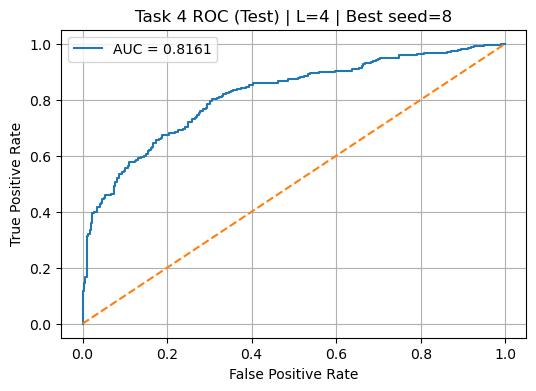

In [82]:
best_model = best["model"]
best_seed = best["seed"]

test_probs_best = best_model.predict_proba(X_test_scaled)
plot_roc(y_test, test_probs_best, title=f"Task 4 ROC (Test) | L={n_layers} | Best seed={best_seed}")

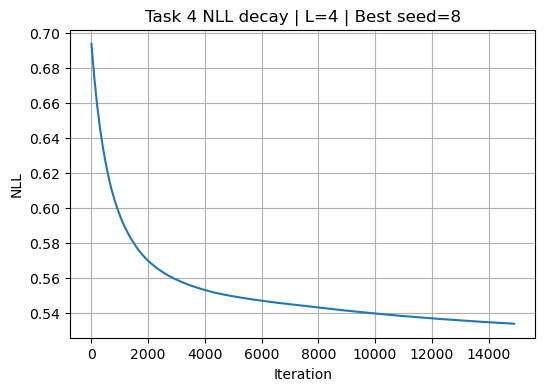

In [83]:
plot_nll(best_model.loss_history, best_model.record_every, title=f"Task 4 NLL decay | L={n_layers} | Best seed={best_seed}"

-Task 4 generalizes the dynamic ensemble framework to an arbitrary number of layers, allowing hierarchical probabilistic routing with depth L. 

-Each additional layer increases model capacity by introducing new logistic gating functions, while preserving interpretability.

# Comparison State-of-the-Art Methods

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# Helpers
def best_threshold_from_val(y_val, val_probs, metric="acc"):
    best_t = 0.5
    best_score = -1e9

    thresholds = np.linspace(0.05, 0.95, 181)
    for t in thresholds:
        preds = (val_probs >= t).astype(int)

        if metric == "acc":
            score = accuracy_score(y_val, preds)
        elif metric == "youden":
            fpr, tpr, _ = roc_curve(y_val, val_probs)
            #keep acc by default
            score = accuracy_score(y_val, preds)
        else:
            score = accuracy_score(y_val, preds)

        if score > best_score:
            best_score = score
            best_t = t
    return best_t, best_score


def evaluate_probs(y_true, probs, thr=0.5):
    preds = (probs >= thr).astype(int)
    return {
        "acc": accuracy_score(y_true, preds),
        "auc": roc_auc_score(y_true, probs),
        "prec": precision_score(y_true, preds, zero_division=0),
        "rec": recall_score(y_true, preds, zero_division=0),
        "cm": confusion_matrix(y_true, preds)
    }


def plot_roc_curve(y_true, probs, title):
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc_val = roc_auc_score(y_true, probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_val:.4f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# models 


 sklearn LogisticRegression
  threshold: 0.39
  VAL : {'acc': 0.7637, 'auc': 0.8185, 'prec': 0.7492, 'rec': 0.8394}
  TEST: {'acc': 0.7406, 'auc': 0.8165, 'prec': 0.7328, 'rec': 0.8099}
  TEST confusion matrix:
 [[197 101]
 [ 65 277]]


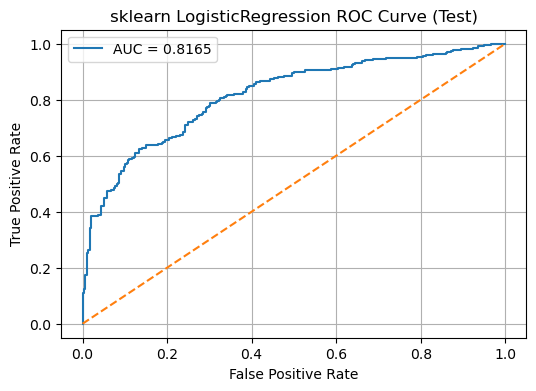


 RandomForest
  threshold: 0.51
  VAL : {'acc': 0.8086, 'auc': 0.8692, 'prec': 0.8385, 'rec': 0.7956}
  TEST: {'acc': 0.7844, 'auc': 0.8636, 'prec': 0.8129, 'rec': 0.7749}
  TEST confusion matrix:
 [[237  61]
 [ 77 265]]


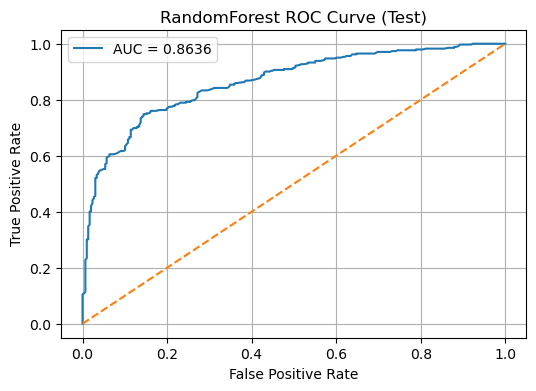


 GradientBoosting
  threshold: 0.45
  VAL : {'acc': 0.7617, 'auc': 0.8306, 'prec': 0.7714, 'rec': 0.7883}
  TEST: {'acc': 0.7672, 'auc': 0.829, 'prec': 0.783, 'rec': 0.7807}
  TEST confusion matrix:
 [[224  74]
 [ 75 267]]


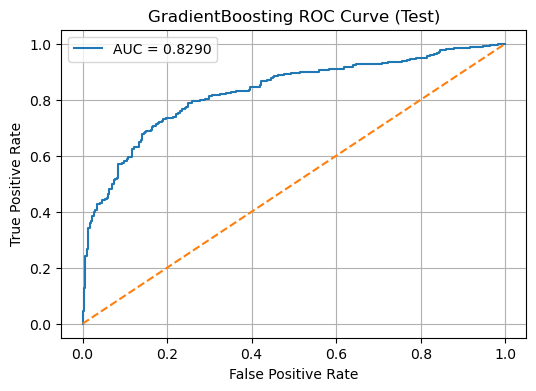

Model   VAL Acc   VAL AUC  TEST Acc  TEST AUC  \
1                RandomForest  0.808594  0.869250  0.784375  0.863633   
2            GradientBoosting  0.761719  0.830553  0.767188  0.829036   
0  sklearn LogisticRegression  0.763672  0.818484  0.740625  0.816496   

   TEST Prec  TEST Rec  Threshold  
1   0.812883  0.774854      0.510  
2   0.782991  0.780702      0.455  
0   0.732804  0.809942      0.390

In [91]:
models = {
    "sklearn LogisticRegression": LogisticRegression(
        max_iter=5000,
        solver="lbfgs"
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingClassifier(
        random_state=42
    )
}

results = []

for name, clf in models.items():
    clf.fit(X_tr2, y_tr2)

    # Probabilities
    val_probs  = clf.predict_proba(X_val2)[:, 1]
    test_probs = clf.predict_proba(X_test_scaled)[:, 1]

    # Threshold chosen on VAL
    thr, _ = best_threshold_from_val(y_val2, val_probs, metric="acc")

    val_m  = evaluate_probs(y_val2, val_probs, thr=thr)
    test_m = evaluate_probs(y_test, test_probs, thr=thr)

    results.append({
        "Model": name,
        "VAL Acc": val_m["acc"],
        "VAL AUC": val_m["auc"],
        "TEST Acc": test_m["acc"],
        "TEST AUC": test_m["auc"],
        "TEST Prec": test_m["prec"],
        "TEST Rec": test_m["rec"],
        "Threshold": thr
    })

    print("\n", name)
    print("  threshold:", round(thr, 2))
    print("  VAL :", {k: round(val_m[k],4) for k in ["acc","auc","prec","rec"]})
    print("  TEST:", {k: round(test_m[k],4) for k in ["acc","auc","prec","rec"]})
    print("  TEST confusion matrix:\n", test_m["cm"])

    # ROC plot (test)
    plot_roc_curve(y_test, test_probs, title=f"{name} ROC Curve (Test)")

df_results = pd.DataFrame(results).sort_values("TEST AUC", ascending=False)
display(df_results)

-Tree-based ensemble methods such as Random Forests and Gradient Boosting achieve the highest absolute AUC on this dataset, reflecting their strong representational capacity for tabular data. However, these models lack a probabilistic routing mechanism and do not admit a globally differentiable likelihood function. In contrast, the proposed dynamic ensemble model provides a probabilistically interpretable hierarchical structure with smooth, differentiable decision boundaries. While its predictive performance is slightly below that of state-of-the-art tree ensembles, it consistently outperforms linear baselines and offers a principled likelihood-based framework that bridges the gap between logistic regression and complex ensemble methods.

# Displaying all results in one table from task1 

In [97]:
results = [
    #Proposed models
    {"Group": "Proposed", "Order": 1, "Model": "Task 1 (Scratch LR)", 
     "Depth(L)": 1, "TEST Acc": 0.7188, "TEST AUC": 0.8165, "TEST Prec": 0.7647, "TEST Rec": 0.6842},

    {"Group": "Proposed", "Order": 2, "Model": "Task 2 (Dynamic Ensemble)", 
     "Depth(L)": 2, "TEST Acc": 0.7469, "TEST AUC": 0.8110, "TEST Prec": 0.7795, "TEST Rec": 0.7339},

    {"Group": "Proposed", "Order": 3, "Model": "Task 3 (Dynamic Ensemble)", 
     "Depth(L)": 3, "TEST Acc": 0.7484, "TEST AUC": 0.8182, "TEST Prec": 0.7479, "TEST Rec": 0.7982},

    {"Group": "Proposed", "Order": 4, "Model": "Task 4 (Generalized)", 
     "Depth(L)": 4, "TEST Acc": 0.7453, "TEST AUC": 0.8161, "TEST Prec": 0.7374, "TEST Rec": 0.8129},

    # State-of-the-art baselines 
    {"Group": "Baseline", "Order": 5, "Model": "sklearn LogisticRegression", 
     "Depth(L)": "-", "TEST Acc": 0.7406, "TEST AUC": 0.8165, "TEST Prec": 0.7328, "TEST Rec": 0.8099},

    {"Group": "Baseline", "Order": 6, "Model": "GradientBoosting", 
     "Depth(L)": "-", "TEST Acc": 0.7672, "TEST AUC": 0.8290, "TEST Prec": 0.7830, "TEST Rec": 0.7807},

    {"Group": "Baseline", "Order": 7, "Model": "RandomForest", 
     "Depth(L)": "-", "TEST Acc": 0.7844, "TEST AUC": 0.8636, "TEST Prec": 0.8129, "TEST Rec": 0.7749},
]

In [98]:
df = pd.DataFrame(results)
df = df.sort_values("Order").reset_index(drop=True)

df_style = df.style.format({
    "TEST Acc": "{:.4f}",
    "TEST AUC": "{:.4f}",
    "TEST Prec": "{:.4f}",
    "TEST Rec": "{:.4f}",
})

display(df_style)